In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
#Create  dataframe 
data=pd.DataFrame(iris.data)

In [7]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# craete target column in dataframe
data['target']=pd.DataFrame(iris.target)

In [9]:
data.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# split the data into training and test dataset
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['target'],axis='columns'), data.target, test_size=0.33, random_state=0)

In [13]:
# train the model
from sklearn.ensemble import RandomForestClassifier

In [21]:
model=RandomForestClassifier(n_estimators=30)

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [23]:
model.score(x_test,y_test)

0.96

In [24]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(model.predict(x_test),y_test)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

Text(33.0, 0.5, 'predicted')

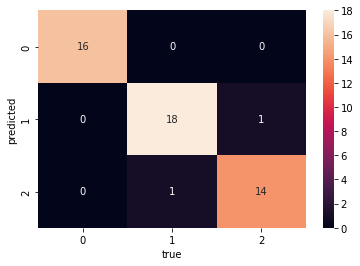

In [26]:
plt.gray()
sns.heatmap(cm,annot=True)
plt.xlabel('true')
plt.ylabel('predicted')

#  cross validation on iris dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=0)

In [5]:
#import cross validation function
from sklearn.model_selection import cross_val_score

In [6]:
# first try for logistiic Regression
from sklearn.linear_model import LogisticRegression

In [39]:
lr=cross_val_score(LogisticRegression(max_iter=1000),iris.data,iris.target)
lr

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [40]:
# for svm
from sklearn.svm import SVC
svm=cross_val_score(SVC(),iris.data,iris.target)
svm

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [41]:
# for random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=cross_val_score(RandomForestClassifier(n_estimators=50),iris.data,iris.target)
rf

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [42]:
# fro decision tree
from sklearn.tree import DecisionTreeClassifier
tree=cross_val_score(DecisionTreeClassifier(),iris.data,iris.target)
tree

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [37]:
tree

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [43]:
lr.mean()

0.9733333333333334

In [44]:
svm.mean()

0.9666666666666666

In [45]:
rf.mean()

0.9533333333333334

In [46]:
tree.mean()

0.9600000000000002

# hence it is proved that average of accuracy of logistic Regression is highest so we will chose logistic regresion algorithm for iris data set cclassifiaction
